# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-11-16 21:09:35--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.001s  

2025-11-16 21:09:35 (67.8 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,179,89,44,70,137,58,6,136,49,18,146,168,273,166,78,10,3,186,187
1,764,103,53,106,172,55,10,212,32,24,168,220,660,223,73,16,24,187,197
2,334,107,57,102,184,55,7,234,28,26,171,243,822,229,77,7,11,187,187
3,184,103,46,106,209,66,10,203,33,23,149,217,612,210,70,9,10,191,199
4,786,107,55,103,213,68,11,219,30,25,172,221,709,216,70,10,7,187,197
5,620,108,56,103,234,73,10,221,30,25,174,232,718,214,73,8,3,187,197
6,67,98,55,101,219,69,11,225,30,25,178,231,748,216,74,6,14,187,195
7,112,77,38,75,144,59,6,147,46,19,132,167,315,136,80,16,20,181,187
8,556,108,56,102,246,75,6,239,28,26,167,264,855,228,82,9,13,186,185
9,514,89,38,74,138,59,7,136,49,18,133,167,278,128,72,7,7,189,193


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.677596,93.442623,44.686703,81.686703,168.351548,61.757741,8.641166,167.817851,41.229508,20.513661,147.737705,187.624772,434.990893,173.48816,72.484517,6.107468,12.817851,188.839709,195.612022
std,244.525773,7.981896,6.314176,15.928565,33.981509,8.363195,4.818666,33.619864,7.913663,2.622595,14.900658,31.913853,178.454460,33.23147,7.411413,4.894258,8.869058,6.228891,7.413782
min,3.000000,73.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,204.000000,88.000000,39.000000,70.000000,140.000000,57.000000,7.000000,145.000000,34.000000,19.000000,135.000000,166.000000,314.000000,146.00000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,413.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,178.000000,362.000000,172.00000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,629.000000,99.000000,49.000000,98.000000,194.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,215.000000,578.000000,197.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,261.000000,59.000000,28.000000,188.000000,320.000000,998.000000,268.00000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE
# Как видно из X_train_pd.describe(), признаки в наборе данных имеют очень разные масштабы (например, среднее значение для признака 12 составляет ~435, а для признака 15 — ~6)
# Модели, чувствительные к масштабу, такие как логистическая регрессия и PCA, могут работать некорректно, если данные не нормализованы
# StandardScaler преобразует каждый признак так, чтобы он имел среднее значение 0 и стандартное отклонение 1
# Важно обучать (fit) скейлер только на обучающих данных, чтобы избежать утечки информации из тестового набора, а затем применять то же преобразование (transform) к обоим наборам данных

from sklearn.preprocessing import StandardScaler

# Инициализация StandardScaler
scaler = StandardScaler()

# Обучение скейлера на тренировочных данных и преобразование X_train
X_train_scaled = scaler.fit_transform(X_train)

# Преобразование X_test с использованием того же скейлера
X_test_scaled = scaler.transform(X_test)

print("Среднее значение для каждого признака в X_train_scaled (должно быть близко к 0):")
print(X_train_scaled.mean(axis=0))
print("\nСтандартное отклонение для каждого признака в X_train_scaled (должно быть близко к 1):")
print(X_train_scaled.std(axis=0))

Среднее значение для каждого признака в X_train_scaled (должно быть близко к 0):
[-6.67979131e-18  5.03746003e-16 -1.92115095e-18  4.44898116e-18
 -1.05587468e-16  1.04753284e-16  1.53085397e-16 -3.70175455e-16
 -1.20324718e-16  6.88985400e-16 -2.23156850e-16 -3.94442625e-16
  1.17898001e-16 -2.48157091e-16 -4.53391625e-16  4.74094554e-17
  5.05566040e-19 -1.47665729e-15 -1.50901352e-15]

Стандартное отклонение для каждого признака в X_train_scaled (должно быть близко к 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
### YOUR CODE HERE

In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Лучшие параметры: {'C': 1}
Accuracy: 0.8013
F1 Score (weighted): 0.7984


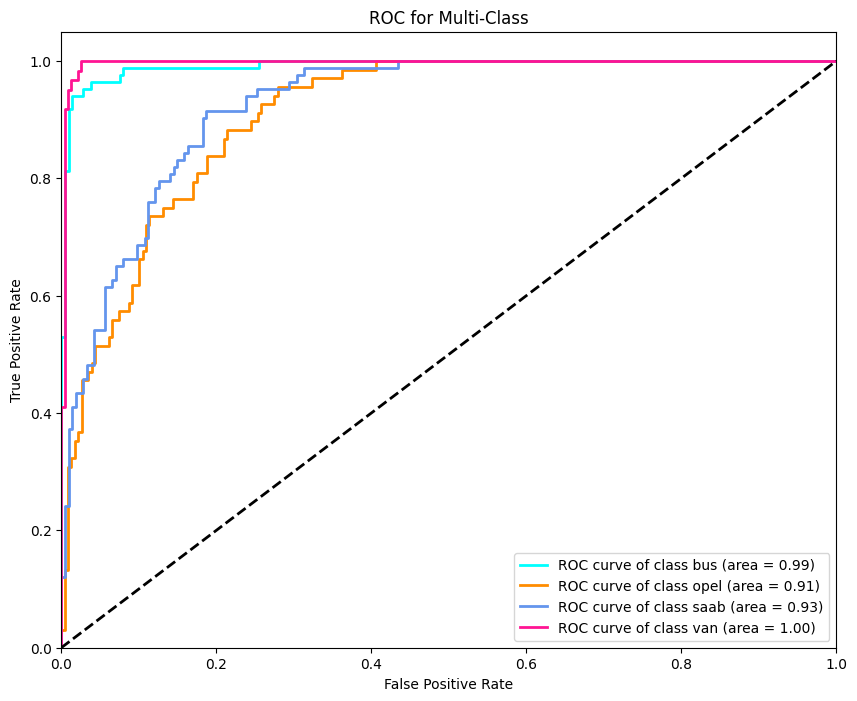

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Код для обучения модели (остается без изменений)
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_log_reg = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")
y_pred = best_log_reg.predict(X_test_scaled)
y_pred_proba = best_log_reg.predict_proba(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Бинаризуем метки для мультиклассовой ROC-кривой
classes = best_log_reg.classes_
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Вычисляем FPR, TPR и AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Строим ROC-кривые для каждого класса
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'deeppink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multi-Class')
plt.legend(loc="lower right")
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

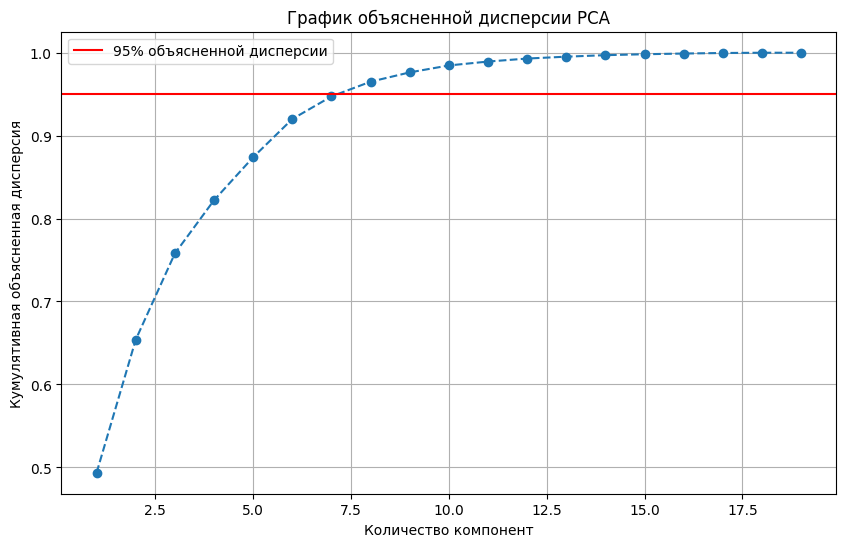

In [13]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

# Применение PCA ко всем компонентам для анализа
pca = PCA()
pca.fit(X_train_scaled)

# Вычисление кумулятивной объясненной дисперсии
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.title('График объясненной дисперсии PCA')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% объясненной дисперсии')
plt.legend(loc='best')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
# Выбор количества компонент:
# График из предыдущего шага показывает, что мы можем значительно уменьшить количество признаков, сохранив при этом большую часть информации (дисперсии)
# Я выбрал количество компонент, которое объясняет не менее 95% дисперсии
# Это распространенный порог, который позволяет уменьшить сложность модели и шум, сохраняя при этом важную информацию.

# Нормализация данных:
# Да, данные следует нормализовать перед применением PCA
# PCA ищет направления максимальной дисперсии
# Если один признак имеет гораздо больший диапазон значений, чем другие, он будет доминировать в первой главной компоненте, даже если он не является самым "информативным"
# Масштабирование гарантирует, что все признаки вносят равный вклад

In [14]:
### YOUR CODE HERE
# Выбор количества компонент, объясняющих 95% дисперсии
n_components = np.where(explained_variance_ratio_cumulative >= 0.95)[0][0] + 1
print(f"Выбранное количество компонент: {n_components}")

# Создание экземпляра PCA с выбранным количеством компонент
pca = PCA(n_components=n_components)

# Обучение PCA на масштабированных тренировочных данных и их преобразование
X_train_pca = pca.fit_transform(X_train_scaled)

# Преобразование масштабированных тестовых данных
X_test_pca = pca.transform(X_test_scaled)

print("Размерность исходных тренировочных данных:", X_train_scaled.shape)
print("Размерность тренировочных данных после PCA:", X_train_pca.shape)
print("Размерность тестовых данных после PCA:", X_test_pca.shape)

Выбранное количество компонент: 8
Размерность исходных тренировочных данных: (549, 19)
Размерность тренировочных данных после PCA: (549, 8)
Размерность тестовых данных после PCA: (297, 8)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Лучшие параметры для данных PCA: {'C': 10}
Accuracy на данных PCA: 0.7037
F1 Score (weighted) на данных PCA: 0.6924


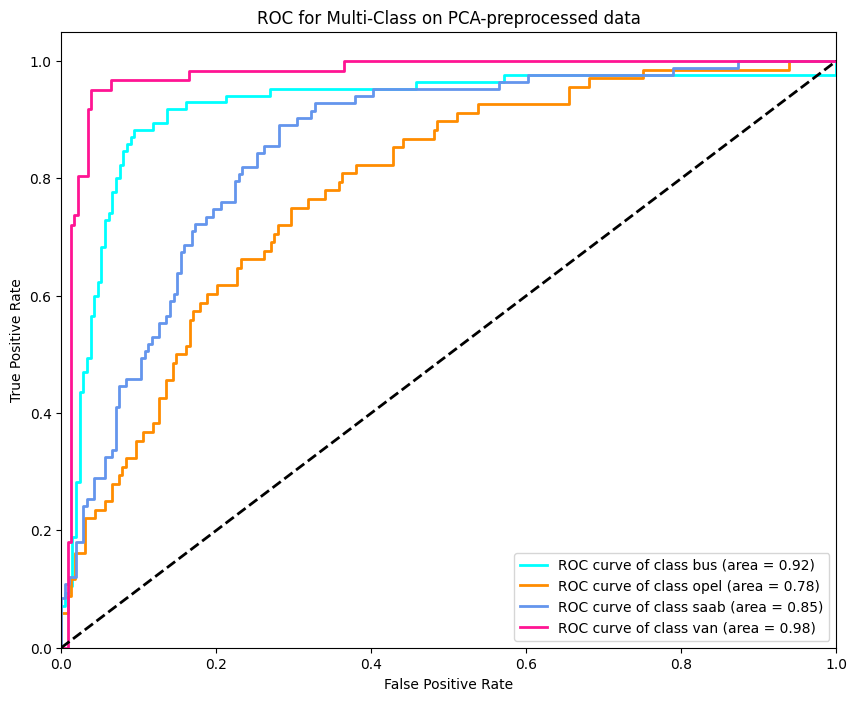

In [16]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Создание экземпляра модели. Параметр multi_class убран, чтобы избежать FutureWarning.
log_reg_pca = LogisticRegression(solver='saga', tol=1e-3, max_iter=500, random_state=42)

# Определение сетки параметров для поиска
param_grid_pca = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Использование GridSearchCV для поиска лучших гиперпараметров на данных PCA
grid_search_pca = GridSearchCV(log_reg_pca, param_grid_pca, cv=5, scoring='accuracy')
grid_search_pca.fit(X_train_pca, y_train)

# Получение лучшей модели
best_log_reg_pca = grid_search_pca.best_estimator_
print(f"Лучшие параметры для данных PCA: {grid_search_pca.best_params_}")

# Предсказания на тестовом наборе PCA
y_pred_pca = best_log_reg_pca.predict(X_test_pca)
y_pred_proba_pca = best_log_reg_pca.predict_proba(X_test_pca)

# Оценка качества модели
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

print(f"Accuracy на данных PCA: {accuracy_pca:.4f}")
print(f"F1 Score (weighted) на данных PCA: {f1_pca:.4f}")

# Бинаризуем метки для мультиклассовой ROC-кривой
classes_pca = best_log_reg_pca.classes_
y_test_binarized_pca = label_binarize(y_test, classes=classes_pca)
n_classes_pca = y_test_binarized_pca.shape[1]

# Вычисляем FPR, TPR и AUC для каждого класса
fpr_pca = dict()
tpr_pca = dict()
roc_auc_pca = dict()
for i in range(n_classes_pca):
    fpr_pca[i], tpr_pca[i], _ = roc_curve(y_test_binarized_pca[:, i], y_pred_proba_pca[:, i])
    roc_auc_pca[i] = auc(fpr_pca[i], tpr_pca[i])

# Строим ROC-кривые для каждого класса
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'deeppink']
for i, color in zip(range(n_classes_pca), colors):
    plt.plot(fpr_pca[i], tpr_pca[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(classes_pca[i], roc_auc_pca[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multi-Class on PCA-preprocessed data')
plt.legend(loc="lower right")
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [17]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
# Создание экземпляра классификатора дерева решений
tree_clf = DecisionTreeClassifier(random_state=42)

# Определение сетки параметров для поиска (глубина дерева)
param_grid_tree = {'max_depth': range(2, 21)}

# Использование GridSearchCV для поиска лучшей глубины
grid_search_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='accuracy')
# Деревья решений не требуют масштабирования, но для согласованности будем использовать масштабированные данные
grid_search_tree.fit(X_train_scaled, y_train)

# Получение лучшей модели
best_tree = grid_search_tree.best_estimator_
print(f"Лучшая глубина дерева: {grid_search_tree.best_params_['max_depth']}")

# Предсказания на тестовом наборе
y_pred_tree = best_tree.predict(X_test_scaled)

# Оценка качества модели
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print(f"Accuracy дерева решений: {accuracy_tree:.4f}")
print(f"F1 Score (weighted) дерева решений: {f1_tree:.4f}")

Лучшая глубина дерева: 4
Accuracy дерева решений: 0.7138
F1 Score (weighted) дерева решений: 0.6952


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

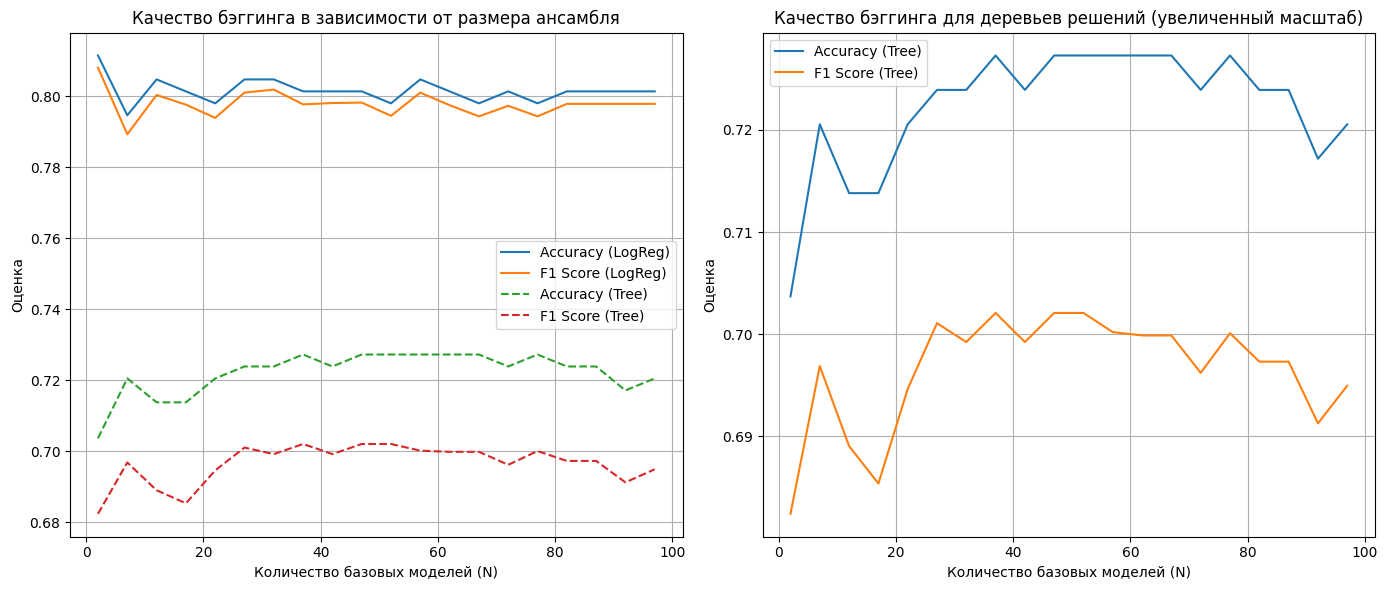

In [19]:
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Диапазон размеров ансамбля
n_estimators_range = range(2, 101, 5)

# --- Бэггинг для логистической регрессии ---
# Используем лучшие параметры, найденные в 2.1
base_log_reg = best_log_reg
log_reg_f1_scores, log_reg_accuracy_scores = [], []

for n_estimators in n_estimators_range:
    # ИЗМЕНЕНИЕ: base_estimator -> estimator
    bagging_clf_lr = BaggingClassifier(estimator=base_log_reg, n_estimators=n_estimators, random_state=42, n_jobs=-1)
    bagging_clf_lr.fit(X_train_scaled, y_train)
    y_pred = bagging_clf_lr.predict(X_test_scaled)
    log_reg_accuracy_scores.append(accuracy_score(y_test, y_pred))
    log_reg_f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# --- Бэггинг для деревьев решений ---
# Используем лучшие параметры, найденные в 2.5
base_tree = best_tree
tree_f1_scores, tree_accuracy_scores = [], []

for n_estimators in n_estimators_range:
    bagging_clf_tree = BaggingClassifier(estimator=base_tree, n_estimators=n_estimators, random_state=42, n_jobs=-1)
    bagging_clf_tree.fit(X_train_scaled, y_train)
    y_pred = bagging_clf_tree.predict(X_test_scaled)
    tree_accuracy_scores.append(accuracy_score(y_test, y_pred))
    tree_f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# --- Построение графиков ---
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, log_reg_accuracy_scores, label='Accuracy (LogReg)')
plt.plot(n_estimators_range, log_reg_f1_scores, label='F1 Score (LogReg)')
plt.plot(n_estimators_range, tree_accuracy_scores, label='Accuracy (Tree)', linestyle='--')
plt.plot(n_estimators_range, tree_f1_scores, label='F1 Score (Tree)', linestyle='--')
plt.title('Качество бэггинга в зависимости от размера ансамбля')
plt.xlabel('Количество базовых моделей (N)')
plt.ylabel('Оценка')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, tree_accuracy_scores, label='Accuracy (Tree)')
plt.plot(n_estimators_range, tree_f1_scores, label='F1 Score (Tree)')
plt.title('Качество бэггинга для деревьев решений (увеличенный масштаб)')
plt.xlabel('Количество базовых моделей (N)')
plt.ylabel('Оценка')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

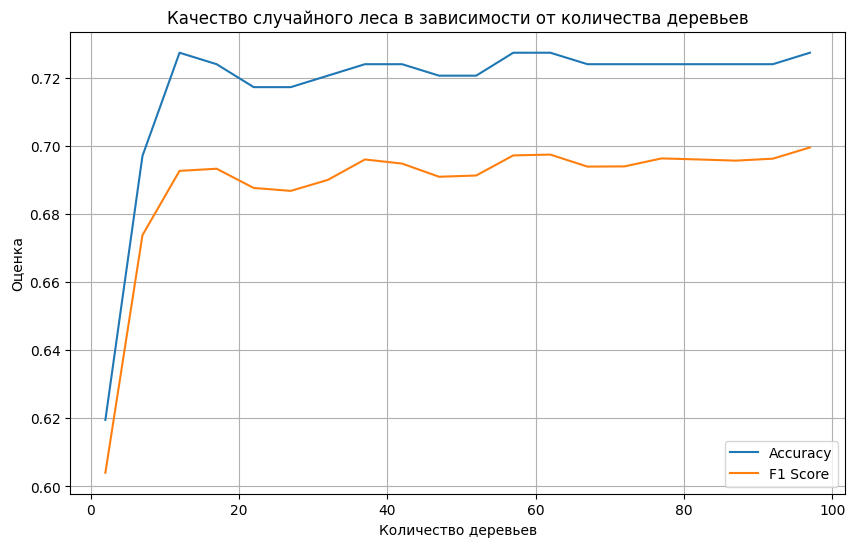

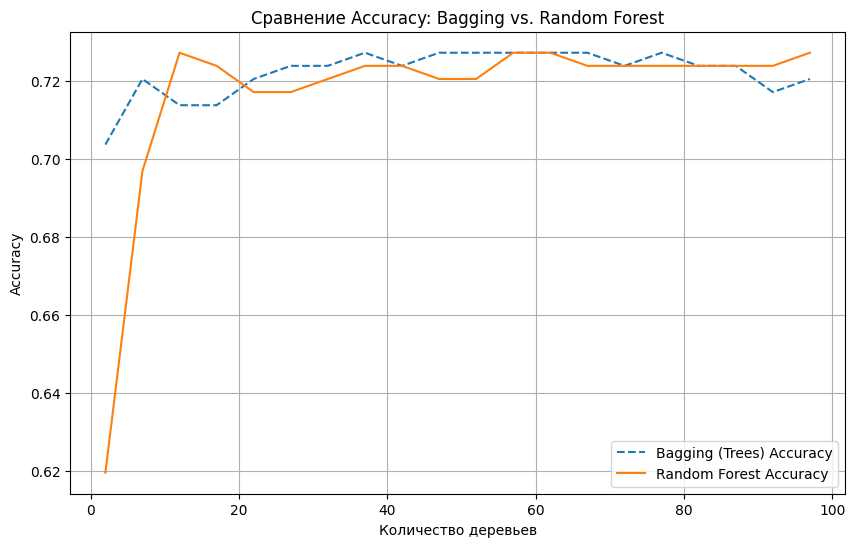

In [20]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

n_estimators_range = range(2, 101, 5)
rf_f1_scores, rf_accuracy_scores = [], []

for n_estimators in n_estimators_range:
    # Используем max_depth, найденный для одного дерева, как отправную точку, но RF часто выигрывает от более глубоких деревьев
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_tree.max_depth, random_state=42, n_jobs=-1)
    rf_clf.fit(X_train_scaled, y_train)
    y_pred = rf_clf.predict(X_test_scaled)
    rf_accuracy_scores.append(accuracy_score(y_test, y_pred))
    rf_f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# --- Построение графиков ---
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, rf_accuracy_scores, label='Accuracy')
plt.plot(n_estimators_range, rf_f1_scores, label='F1 Score')
plt.title('Качество случайного леса в зависимости от количества деревьев')
plt.xlabel('Количество деревьев')
plt.ylabel('Оценка')
plt.legend()
plt.grid(True)
plt.show()

# Сравнение с бэггингом деревьев
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, tree_accuracy_scores, label='Bagging (Trees) Accuracy', linestyle='--')
plt.plot(n_estimators_range, rf_accuracy_scores, label='Random Forest Accuracy')
plt.title('Сравнение Accuracy: Bagging vs. Random Forest')
plt.xlabel('Количество деревьев')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Использование 12 деревьев для Random Forest
Обучение на 55 сэмплах...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Обучение на 110 сэмплах...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Обучение на 165 сэмплах...
Обучение на 220 сэмплах...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Обучение на 275 сэмплах...
Обучение на 330 сэмплах...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Обучение на 385 сэмплах...
Обучение на 440 сэмплах...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Обучение на 495 сэмплах...
Обучение на 549 сэмплах...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


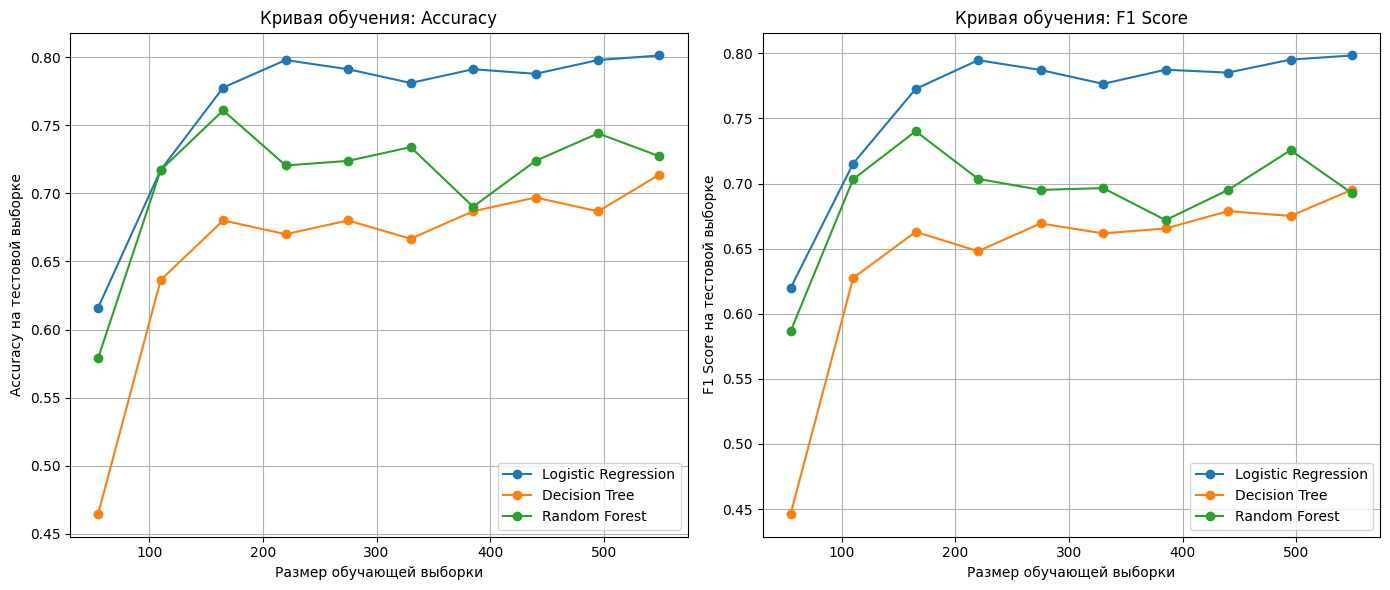

In [21]:
# YOUR CODE HERE
# Разделение тренировочных данных на 10 частей
X_train_parts = np.array_split(X_train_scaled, 10)
y_train_parts = np.array_split(y_train, 10)

train_sizes = []
log_reg_scores, tree_scores, rf_scores = [], [], []

# Оптимальное количество деревьев для RF из предыдущего шага
optimal_n_estimators_rf = n_estimators_range[np.argmax(rf_accuracy_scores)]
print(f"Использование {optimal_n_estimators_rf} деревьев для Random Forest")

# Инициализация моделей с оптимальными гиперпараметрами
log_reg_model = best_log_reg
tree_model = best_tree
rf_model = RandomForestClassifier(n_estimators=optimal_n_estimators_rf, max_depth=best_tree.max_depth, random_state=42, n_jobs=-1)

models = {
    "Logistic Regression": (log_reg_model, log_reg_scores),
    "Decision Tree": (tree_model, tree_scores),
    "Random Forest": (rf_model, rf_scores)
}

X_train_current = np.empty((0, X_train_scaled.shape[1]))
y_train_current = np.empty(0)

for i in range(10):
    # Добавление следующей части данных
    X_train_current = np.concatenate([X_train_current, X_train_parts[i]], axis=0)
    y_train_current = np.concatenate([y_train_current, y_train_parts[i]], axis=0)

    current_size = len(y_train_current)
    train_sizes.append(current_size)

    print(f"Обучение на {current_size} сэмплах...")

    for name, (model, scores_list) in models.items():
        model.fit(X_train_current, y_train_current)
        y_pred = model.predict(X_test_scaled)

        # Сохранение accuracy и f1
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        scores_list.append({'acc': acc, 'f1': f1})

# --- Построение графиков ---
plt.figure(figsize=(14, 6))

# График Accuracy
plt.subplot(1, 2, 1)
for name, (model, scores_list) in models.items():
    acc_scores = [s['acc'] for s in scores_list]
    plt.plot(train_sizes, acc_scores, marker='o', linestyle='-', label=name)
plt.title('Кривая обучения: Accuracy')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Accuracy на тестовой выборке')
plt.legend()
plt.grid(True)

# График F1-score
plt.subplot(1, 2, 2)
for name, (model, scores_list) in models.items():
    f1_scores = [s['f1'] for s in scores_list]
    plt.plot(train_sizes, f1_scores, marker='o', linestyle='-', label=name)
plt.title('Кривая обучения: F1 Score')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('F1 Score на тестовой выборке')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [26]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Создание наборов данных для LightGBM
lgb_train = lgb.Dataset(X_train_scaled, y_train_encoded)
lgb_test = lgb.Dataset(X_test_scaled, y_test_encoded, reference=lgb_train)

# Определение параметров
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_encoded)),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'n_jobs': -1,
    'seed': 42,
    'verbose': -1
}

print("Запуск кросс-валидации LightGBM для поиска оптимального количества итераций...")

# Использование callbacks для ранней остановки
callbacks = [
    lgb.early_stopping(stopping_rounds=20),
    lgb.log_evaluation(period=0)
]

# Использование lgb.cv для поиска оптимального количества раундов бустинга
cv_results_df = lgb.cv(
    params,
    lgb_train,
    num_boost_round=500,
    nfold=5,
    stratified=True,
    shuffle=True,
    callbacks=callbacks,
    seed=42
)

# Получаем оптимальное количество раундов из длины DataFrame
optimal_rounds = len(cv_results_df)
print(f"Оптимальное количество деревьев (раундов): {optimal_rounds}")

# print("\nРезультат lgb.cv (первые 5 строк):")
# print(cv_results_df.head())

# Обучение финальной модели с оптимальным количеством раундов
bst = lgb.train(
    params,
    lgb_train,
    num_boost_round=optimal_rounds
)

# Предсказание на тестовых данных
y_pred_proba_lgb = bst.predict(X_test_scaled)
# Получение предсказанных классов путем выбора класса с максимальной вероятностью
y_pred_lgb = np.argmax(y_pred_proba_lgb, axis=1)

# Оценка качества модели
accuracy_lgb = accuracy_score(y_test_encoded, y_pred_lgb)
f1_lgb = f1_score(y_test_encoded, y_pred_lgb, average='weighted')

print(f"\nAccuracy LightGBM: {accuracy_lgb:.4f}")
print(f"F1 Score (weighted) LightGBM: {f1_lgb:.4f}")

Запуск кросс-валидации LightGBM для поиска оптимального количества итераций...
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[41]	valid's multi_logloss: 0.53726 + 0.0591389
Оптимальное количество деревьев (раундов): 2

Accuracy LightGBM: 0.7104
F1 Score (weighted) LightGBM: 0.7041
